In [35]:
import os
from sklearn.model_selection import train_test_split
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def convert_to_gray(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return gray_img

def convert_to_lab(img):
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    return lab_img

def extract_a_channel(lab_img):
    a_channel = lab_img[:, :, 1]

    return a_channel

def apply_clahe(a_channel):
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    equalized_a_channel = clahe.apply(a_channel)
    return equalized_a_channel

def dilate_image(img):
    kernel = np.ones((3, 3), np.uint8)
    dilated_img = cv2.dilate(img, kernel, iterations=1)

    return dilated_img

def apply_threshold(img):
    _, thresholded_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresholded_img

def preprocess_image(img):
    gray_img = convert_to_gray(img)
    lab_img = convert_to_lab(img)
    a_channel = extract_a_channel(lab_img)
    equalized_a_channel = apply_clahe(a_channel)
    dilated_img = dilate_image(equalized_a_channel)
    thresholded_img = apply_threshold(dilated_img)
    thresholded_img = np.expand_dims(thresholded_img, axis=-1)
    color_img = np.repeat(thresholded_img, 3, axis=-1)
    return color_img




In [130]:
def load_images_from_folder(folder, target_size=(256, 256), test_size=0.3):
    images = []
    labels = []

    for label, class_folder in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                preprocessed_img = preprocess_image(img)
                images.append(preprocessed_img)
                labels.append(label)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

In [131]:
folder_path = 'C:\SUDHARSHAN\miniProject\Dataset'
X_train, X_test, y_train, y_test = load_images_from_folder(folder_path)



In [132]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1260, 256, 256, 3)
X_test shape: (540, 256, 256, 3)
y_train shape: (1260,)
y_test shape: (540,)


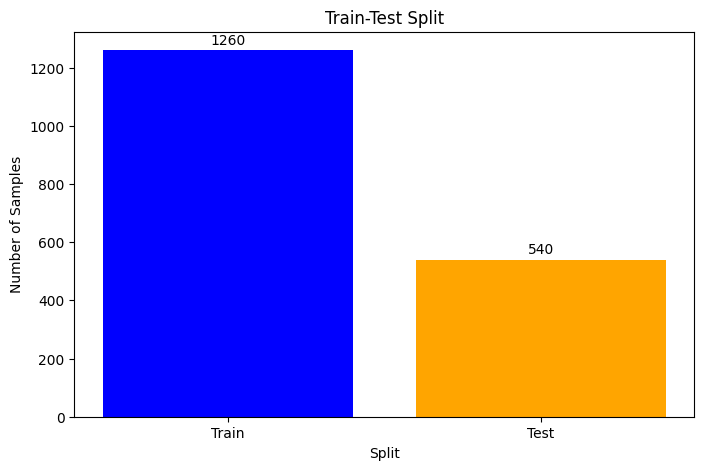

In [133]:
train_samples = len(X_train)
test_samples = len(X_test)

# Labels for the bars
labels = ['Train', 'Test']

# Heights of the bars
heights = [train_samples, test_samples]

# Colors for the bars
colors = ['blue', 'orange']

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, heights, color=colors)

# Adding labels
for i, v in enumerate(heights):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# Adding title and labels
plt.title('Train-Test Split')
plt.xlabel('Split')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()

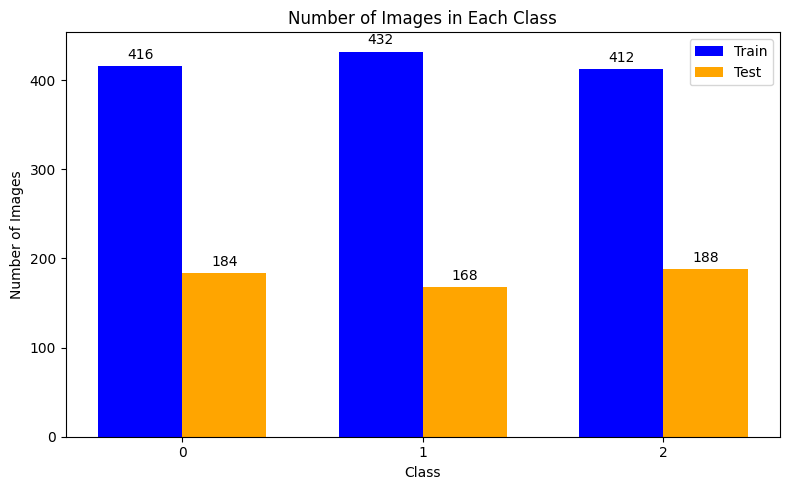

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_train and y_test from the load_images_from_folder function
# Count occurrences of each class label in y_train
train_counts = np.bincount(y_train)

# Count occurrences of each class label in y_test
test_counts = np.bincount(y_test)

# Number of classes
num_classes = len(train_counts)

# Labels for the bars (assuming class labels are 0, 1, 2, ..., num_classes-1)
labels = [str(i) for i in range(num_classes)]

# Heights of the bars
train_heights = train_counts
test_heights = test_counts

# Create bar plot
bar_width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(num_classes)
bar1 = ax.bar(index, train_heights, bar_width, label='Train', color='blue')
bar2 = ax.bar(index + bar_width, test_heights, bar_width, label='Test', color='orange')

# Adding labels
for rects in [bar1, bar2]:
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding title and labels
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images in Each Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


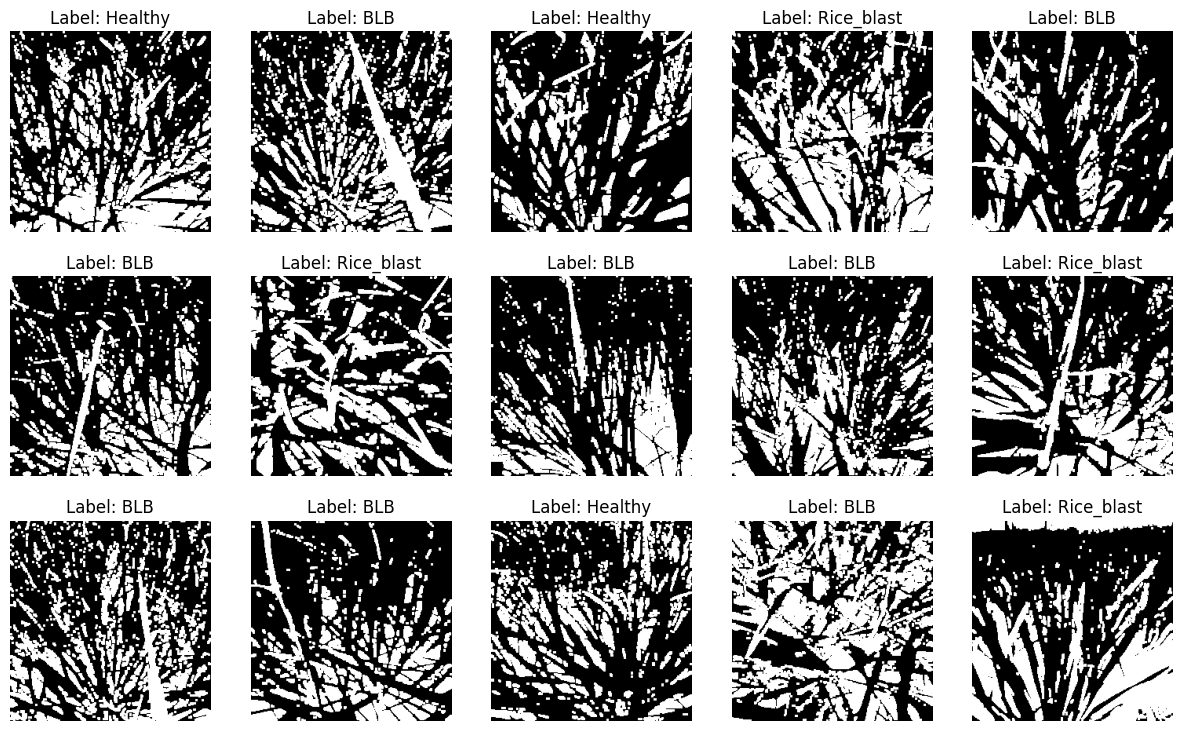

In [40]:
import matplotlib.pyplot as plt

mappings={0:"Healthy",1:"Rice_blast",2:"BLB"}
def visualize_images(images, labels):
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i],cmap = "summer")
        ax.set_title(f"Label: {mappings[labels[i]]}")
        ax.axis('off')
    plt.show()

visualize_images(X_train[15:30], y_train[15:30])


In [41]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
import tensorflow as tf

def create_model():
    
    def add_conv_block(model, num_filters):
        
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(256, 256,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    model = add_conv_block(model, 256)

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_8 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 127, 127, 64)     

In [42]:
%%time

rice_bios_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, batch_size=128
    )

Epoch 1/100
10/10 [==============================] - 185s 18s/step - loss: 20.4460 - accuracy: 0.3571 - val_loss: 3.8105 - val_accuracy: 0.3407
Epoch 2/100
10/10 [==============================] - 184s 18s/step - loss: 2.1382 - accuracy: 0.3635 - val_loss: 7.4045 - val_accuracy: 0.3111
Epoch 3/100
10/10 [==============================] - 184s 19s/step - loss: 1.0728 - accuracy: 0.4095 - val_loss: 7.5284 - val_accuracy: 0.3111
Epoch 4/100
10/10 [==============================] - 185s 19s/step - loss: 1.0105 - accuracy: 0.4952 - val_loss: 14.5338 - val_accuracy: 0.3111
Epoch 5/100
10/10 [==============================] - 187s 19s/step - loss: 0.9213 - accuracy: 0.5778 - val_loss: 8.0843 - val_accuracy: 0.3111
Epoch 6/100
10/10 [==============================] - 185s 19s/step - loss: 0.8841 - accuracy: 0.5952 - val_loss: 11.1095 - val_accuracy: 0.3111
Epoch 7/100
10/10 [==============================] - 196s 20s/step - loss: 0.8275 - accuracy: 0.6389 - val_loss: 4.9357 - val_accuracy: 0.3

In [43]:
training_accuracy = rice_bios_model.history['accuracy'][-1]
validation_accuracy = rice_bios_model.history['val_accuracy'][-1]

print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

Training Accuracy: 0.9888888597488403
Validation Accuracy: 0.8055555820465088


In [44]:
model.save('RB_Model_70_30.h5')

C:\Users\sudha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [150]:
def load_images_from_folder(folder, target_size=(256, 256), test_size=0.2):
    images = []
    labels = []

    for label, class_folder in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                preprocessed_img = preprocess_image(img)
                images.append(preprocessed_img)
                labels.append(label)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

In [151]:
folder_path = 'C:\SUDHARSHAN\miniProject\Dataset'
X_train, X_test, y_train, y_test = load_images_from_folder(folder_path)



In [121]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1440, 256, 256, 3)
X_test shape: (360, 256, 256, 3)
y_train shape: (1440,)
y_test shape: (360,)


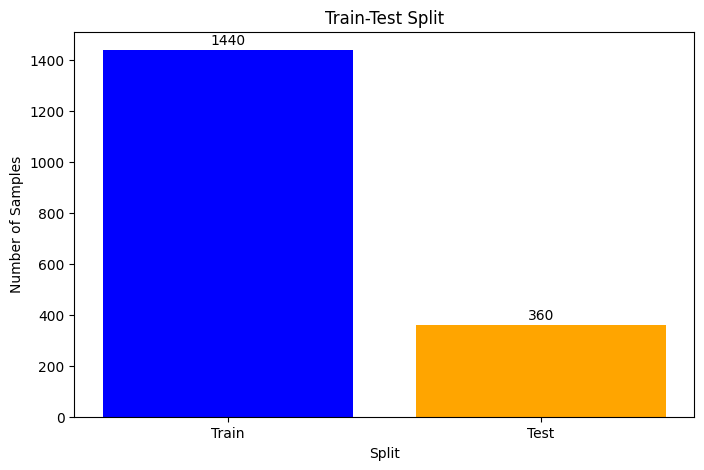

In [128]:
train_samples = len(X_train)
test_samples = len(X_test)

# Labels for the bars
labels = ['Train', 'Test']

# Heights of the bars
heights = [train_samples, test_samples]

# Colors for the bars
colors = ['blue', 'orange']

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, heights, color=colors)

# Adding labels
for i, v in enumerate(heights):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# Adding title and labels
plt.title('Train-Test Split')
plt.xlabel('Split')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()

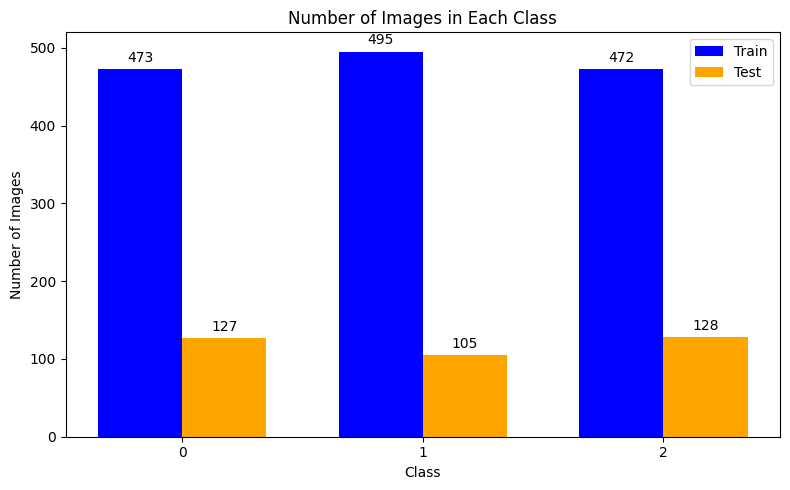

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_train and y_test from the load_images_from_folder function
# Count occurrences of each class label in y_train
train_counts = np.bincount(y_train)

# Count occurrences of each class label in y_test
test_counts = np.bincount(y_test)

# Number of classes
num_classes = len(train_counts)

# Labels for the bars (assuming class labels are 0, 1, 2, ..., num_classes-1)
labels = [str(i) for i in range(num_classes)]

# Heights of the bars
train_heights = train_counts
test_heights = test_counts

# Create bar plot
bar_width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(num_classes)
bar1 = ax.bar(index, train_heights, bar_width, label='Train', color='blue')
bar2 = ax.bar(index + bar_width, test_heights, bar_width, label='Test', color='orange')

# Adding labels
for rects in [bar1, bar2]:
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding title and labels
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images in Each Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [66]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('RB_Model_80_20.h5')


In [67]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your test data
# X_test = ...
# y_test = ...

# Normalize X_test if needed
# X_test = normalize_data(X_test)

# Make predictions on the test data
y_pred = model.predict(X_test)
# Convert the probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)


12/12 [==============================] - 7s 528ms/step
Accuracy: 0.9055555555555556


In [89]:
def visualize_images(images, labels, predicted_labels):
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap="summer")
        if labels[i] == predicted_labels[i]:
            title_color = 'green'  # Actual and predicted are equal
        else:
            title_color = 'red'  # Actual and predicted are not equal
        ax.set_title(f"Actual: {mappings[labels[i]]}\nPredicted: {mappings[predicted_labels[i]]}", color=title_color)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Evaluate model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes))

17/17 [==============================] - 10s 593ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       184
           1       0.93      0.92      0.93       168
           2       0.94      0.92      0.93       188

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



([<matplotlib.axis.YTick at 0x2800b498eb0>,
 [Text(0, 0, 'Healthy'), Text(0, 1, 'Blast'), Text(0, 2, 'BLB')])

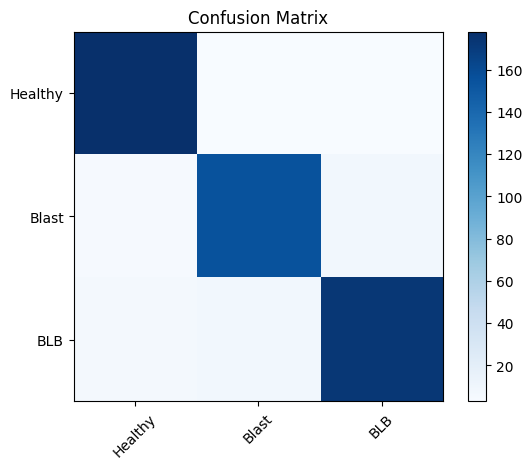

In [142]:
cm = confusion_matrix(y_test, y_pred_classes)
classes= ["Healthy","Blast","BLB"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

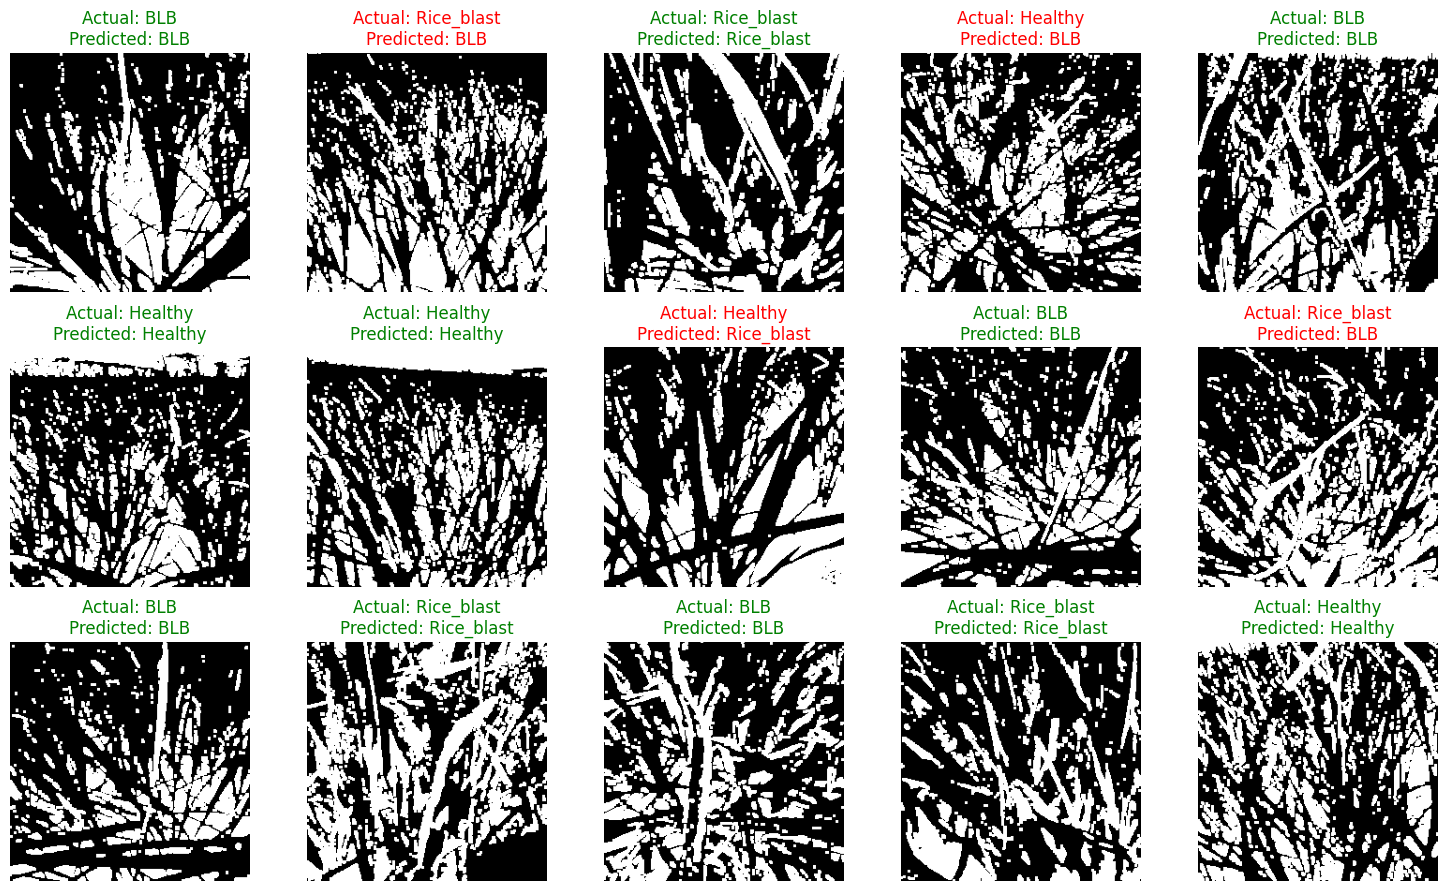

In [90]:
# Visualize some images with actual and predicted labels
visualize_images(X_test, y_test, y_pred_classes)

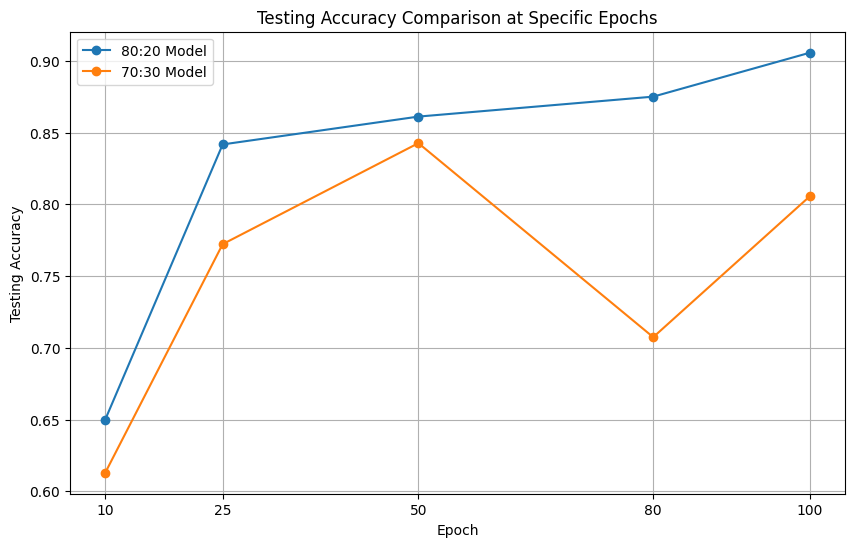

In [106]:
import matplotlib.pyplot as plt

# Example training history for model1 and model2
# Replace these with your actual training histories
model1_history = {'val_accuracy': [0.6500, 0.8417, 0.8611, 0.8750, 0.9056],
                  'val_loss': [0.7709, 0.4144, 0.4901, 0.6635, 0.4822]}
model2_history = rice_bios_model.history

# Get testing accuracy values at specific epochs for model1
epochs_to_check = [10, 25, 50,80, 100]
testing_accuracy_at_epochs1 = {}
i=0
for epoch in epochs_to_check:
    testing_accuracy_at_epochs1[epoch] = model1_history['val_accuracy'][i]
    i+=1


# Get testing accuracy values at specific epochs for model2
testing_accuracy_at_epochs2 = {}

for epoch in epochs_to_check:
    epoch_index = epoch - 1  # Epochs start from 1, but index starts from 0
    if epoch_index < len(model2_history['val_accuracy']):
        testing_accuracy_at_epochs2[epoch] = model2_history['val_accuracy'][epoch_index]
    else:
        print(f"Epoch {epoch} is beyond the number of epochs trained for model2.")

# Plot the testing accuracy for both models
plt.figure(figsize=(10, 6))

# Plot for model1
plt.plot(list(testing_accuracy_at_epochs1.keys()), list(testing_accuracy_at_epochs1.values()), label='80:20 Model', marker='o', linestyle='-')

# Plot for model2
plt.plot(list(testing_accuracy_at_epochs2.keys()), list(testing_accuracy_at_epochs2.values()), label='70:30 Model', marker='o', linestyle='-')

# Add labels and title
plt.title('Testing Accuracy Comparison at Specific Epochs')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.xticks(list(testing_accuracy_at_epochs1.keys()))  # Assuming both models have the same epochs
plt.grid(True)
plt.legend()
plt.show()
